# Data Pre-processing and Exploration

This file contains the details of pre-processing and exploration of the Pima Indian Diabetes database obtained from [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The codes were implemented on a machine with Intel Core i5 processor running at 2.3 GHz.

## Import libraries and dataset

In [21]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, plot_roc_curve, roc_curve, plot_confusion_matrix, classification_report, precision_recall_curve, plot_precision_recall_curve
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
import torch
from torch import nn
import torch.nn.functional as F
import pickle
from time import time
from skorch import NeuralNetClassifier
from skorch.callbacks import EarlyStopping
import sys

In [7]:
# Version of Python used
print('Python==' + str(sys.version))

Python==3.8.8 (default, Feb 24 2021, 13:46:16) 
[Clang 10.0.0 ]


In [22]:
# Version numbers of libraries used
print('pandas==' + str(pd.__version__))
print('matplotlib==' + str(sys.modules[plt.__package__].__version__))
print('numpy==' + str(np.__version__))
print('seaborn==' + str(sns.__version__))
print('missingno==' + str(msno.__version__))
print('statsmodels==' + str(sys.modules[add_constant.__module__[:add_constant.__module__.index(".")]].__version__))
print('scikit-learn==' + str(sys.modules[StandardScaler.__module__[:StandardScaler.__module__.index(".")]].__version__))
print('torch==' + str(torch.__version__))
print('skorch==' + str(sys.modules[NeuralNetClassifier.__module__[:NeuralNetClassifier.__module__.index(".")]].__version__))
print('imbalanced-learn==' + str(sys.modules[SMOTE.__module__[:SMOTE.__module__.index(".")]].__version__))

pandas==1.1.1
matplotlib==3.3.1
numpy==1.19.1
seaborn==0.11.0
missingno==0.4.2
statsmodels==0.12.0
scikit-learn==0.24.1
torch==1.7.1
skorch==0.9.0
imbalanced-learn==0.8.0


Note the 'collections' module (built-in module of Python 3) is also used.

In [3]:
# Import dataset
data = pd.read_csv('diabetes.csv')

In [3]:
# Size of dataset
print('The dataset has %.0f rows and %.0f columns.'%(data.shape[0],data.shape[1]))

The dataset has 768 rows and 9 columns.


In [4]:
# Inspect first five rows of dataset
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Inspect data types of the columns
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Inspect summary statistics of the columns
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Confirm no data is missing
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no missing data.

## Inspect raw data

In [8]:
# Number of data in the two target classes
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

'1' represents diabetes patient. 
'0' represents non-diabetes patient.

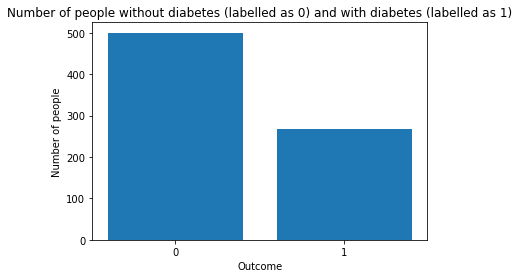

In [9]:
# Visualize the number of data in the two target classes
plt.bar(range(len(data.Outcome.value_counts())), data.Outcome.value_counts())
plt.xticks([0,1])
plt.title("Number of people without diabetes (labelled as 0) and with diabetes (labelled as 1)")
plt.ylabel("Number of people")
plt.xlabel("Outcome")
plt.show()

Number of diabetes patients was only about half the number of non-diabetes patients.

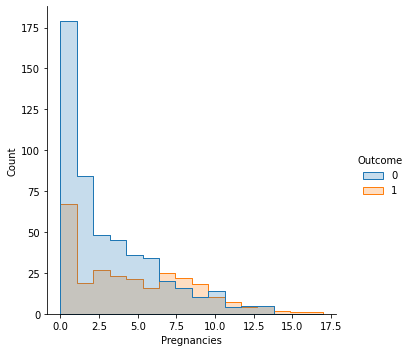

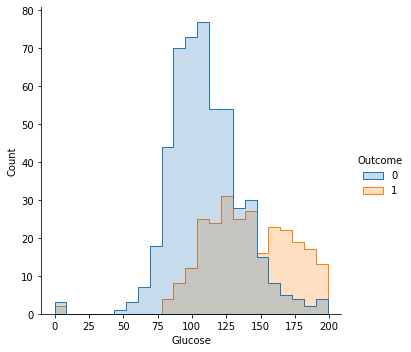

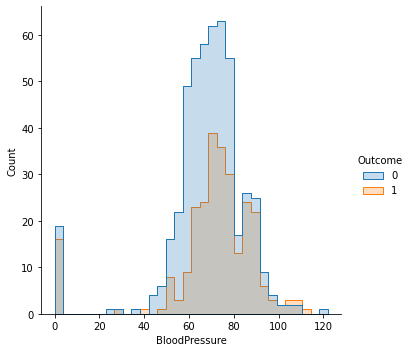

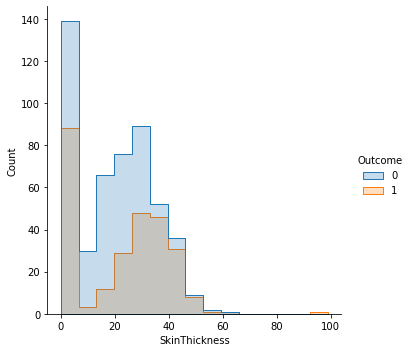

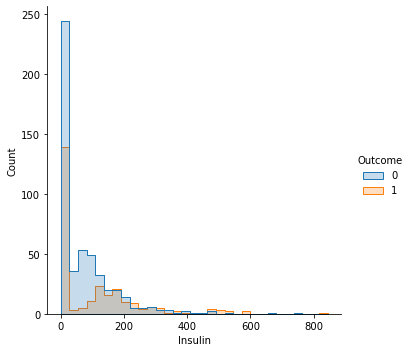

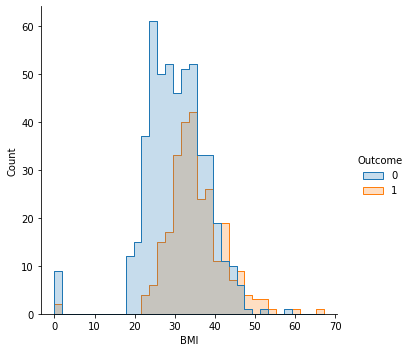

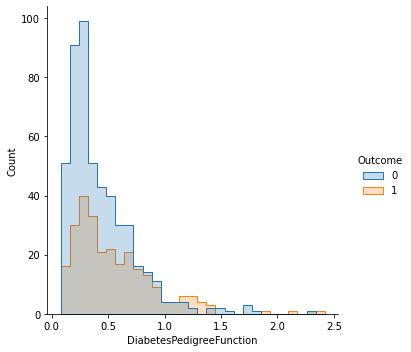

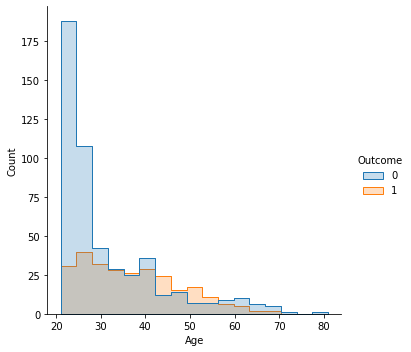

In [10]:
# Visualize the distribution of each feature with outcome overlay
for column in data.columns:
    if column != 'Outcome':
        sns.displot(data, x=column, hue="Outcome", element="step")       
plt.show()

Distribution of the two classes appeared different for 'Glucose'. 'Glucose' for non-diabetes patients followed normal distribution with mean or mode at approximately 100, but that for diabetes patients appeared bimodal with humps at approximately 125 and 175.

The columns 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI' contained significant zero values that were not meaningful. These probably represented missing values.

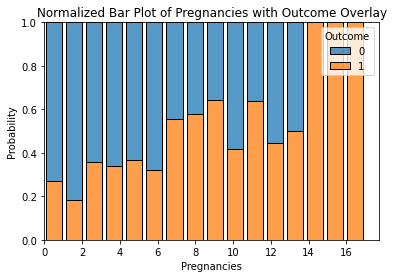

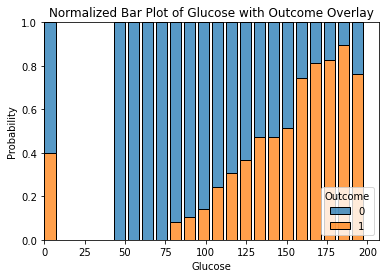

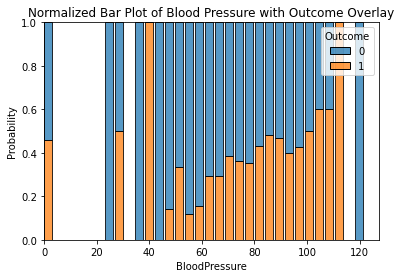

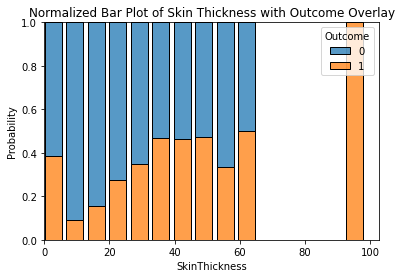

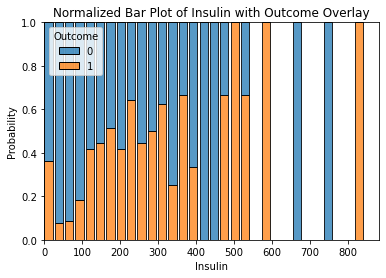

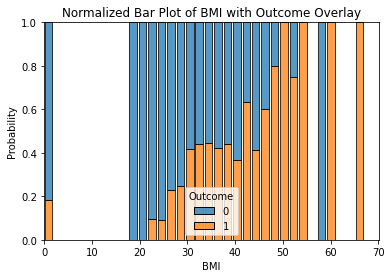

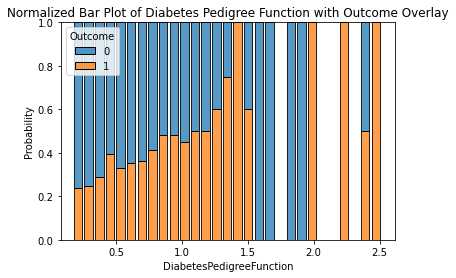

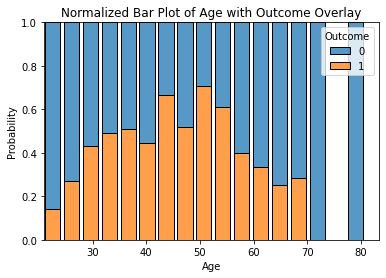

In [11]:
# Visualize normalized bar plot for each feature with outcome overlay
# Code is based on https://github.com/mwaskom/seaborn/issues/1027
sns.histplot(data, x='Pregnancies', hue="Outcome", stat="probability", multiple="fill", shrink=.8)
plt.title('Normalized Bar Plot of Pregnancies with Outcome Overlay')
plt.show()
sns.histplot(data, x='Glucose', hue="Outcome", stat="probability", multiple="fill", shrink=.8)
plt.title('Normalized Bar Plot of Glucose with Outcome Overlay')
plt.show()
sns.histplot(data, x='BloodPressure', hue="Outcome", stat="probability", multiple="fill", shrink=.8)
plt.title('Normalized Bar Plot of Blood Pressure with Outcome Overlay')
plt.show()
sns.histplot(data, x='SkinThickness', hue="Outcome", stat="probability", multiple="fill", shrink=.8)
plt.title('Normalized Bar Plot of Skin Thickness with Outcome Overlay')
plt.show()
sns.histplot(data, x='Insulin', hue="Outcome", stat="probability", multiple="fill", shrink=.8)
plt.title('Normalized Bar Plot of Insulin with Outcome Overlay')
plt.show()
sns.histplot(data, x='BMI', hue="Outcome", stat="probability", multiple="fill", shrink=.8)
plt.title('Normalized Bar Plot of BMI with Outcome Overlay')
plt.show()
sns.histplot(data, x='DiabetesPedigreeFunction', hue="Outcome", stat="probability", multiple="fill", shrink=.8)
plt.title('Normalized Bar Plot of Diabetes Pedigree Function with Outcome Overlay')
plt.show()
sns.histplot(data, x='Age', hue="Outcome", stat="probability", multiple="fill", shrink=.8)
plt.title('Normalized Bar Plot of Age with Outcome Overlay')
plt.show()

Probability of having diabetes appears to increase with 'Pregnancies', 'Glucose', 'BloodPressure','Insulin','BMI','DiabetesPedigreeFunction', but does not appear to increase with 'Age'. The zero values in 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI' may interfere with modelling.

## Comparing methods of handling zero values

In [8]:
# Find out number of zero values in these columns
zero_value_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']               
for col in zero_value_columns:
    print('\'%s\' has %.0f zero values, which account for %.2f%% of dataset.'%(col,data[data[col] == 0].Outcome.count(),data[data[col] == 0].Outcome.count()/len(data)*100))

'Glucose' has 5 zero values, which account for 0.65% of dataset.
'BloodPressure' has 35 zero values, which account for 4.56% of dataset.
'SkinThickness' has 227 zero values, which account for 29.56% of dataset.
'Insulin' has 374 zero values, which account for 48.70% of dataset.
'BMI' has 11 zero values, which account for 1.43% of dataset.


Almost half of the data in'Insulin' has zero values and significant data (almost 30%) in 'SkinThickness' has zero values. 

<AxesSubplot:>

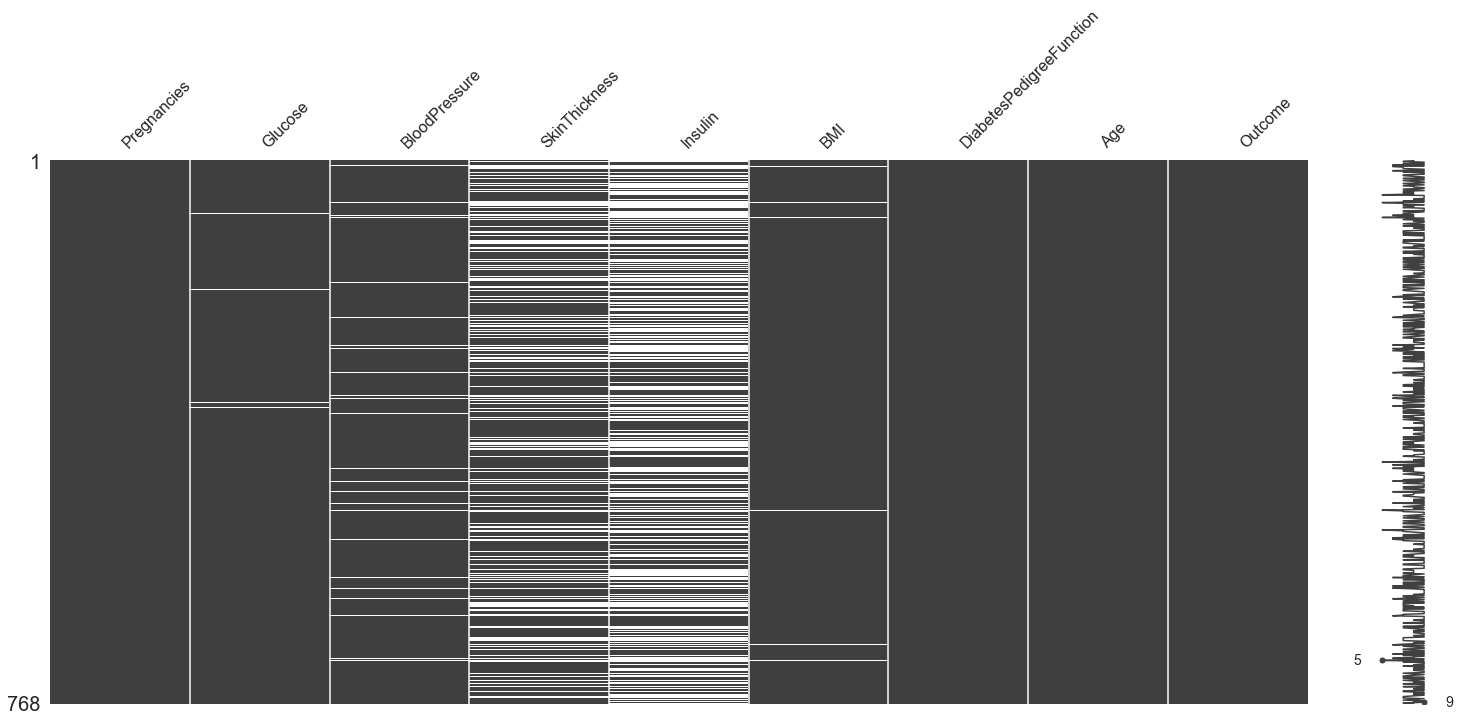

In [9]:
# Replace zero values in these columns with NaN and visualize where these values occur
for col in zero_value_columns:
   data[col]=data[col].replace(0,np.nan)
msno.matrix(data)

The occurrence of zero values do not appear systematic.

Some data with zero 'BMI' appear to also have zero 'BloodPressure', 'SkinThickness' and 'Insulin', but these data only account for a small percentage of the entire dataset.

In [14]:
data.groupby(['Outcome'], dropna=True).count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,497,481,361,264,491,500,500
1,268,266,252,180,130,266,268,268


Zero values appear in roughly the same amount in the two classes. 

**Method 1: Drop the columns 'Insulin' and 'SkinThickness' and impute zero values in  'Glucose', 'BloodPressure' and 'BMI' with mean**

Advantage of this method is that the number of imputed values is reduced and the error caused by imputing zero values is reduced.

Disadvantage of this method is that a significant amount of potentially useful data are lost when the columns 'Insulin' and 'SkinThickness' are dropped.

**Method 2: Impute zero values in columns 'Insulin', 'SkinThickness' 'Glucose', 'BloodPressure' and 'BMI' with mean**

Advantage of this method is that no data is discarded and so more data is available for training.

Disadvantage of this method is that error is introduced when the zero values are imputed.

**Method 3: Impute zero values in columns 'Insulin', 'SkinThickness' 'Glucose', 'BloodPressure' and 'BMI' with k nearest neighbour**

Advantage of this method is that no data is discarded and so more data is available for training.

Disadvantage of this method is that error is introduced when the zero values are imputed.

**Method 4: Impute zero values in columns 'Insulin', 'SkinThickness' 'Glucose', 'BloodPressure' and 'BMI' using Iterative Imputation**

Advantage of this method is that no data is discarded and so more data is available for training.

Disadvantage of this method is that error is introduced when the zero values are imputed.

Effects of different imputation methods on the Area Under the Receiver Operating Characteristic curve (AUC) scores of Support Vector Classifier (SVC) model with radial basis function kernel were compared against a reference model trained using the original dataset.

In [22]:
# Split dataset into features and target
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print(X.shape)

(768, 8)


In [23]:
# Code in this section is based on https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py

In [24]:
# Create a function to test each imputer using Support Vector Classifier (SVC)
classifier = SVC(kernel='rbf', random_state=1)

def get_scores_for_imputer(imputer, X, y):
    estimator = make_pipeline(imputer, classifier)
    impute_scores = cross_val_score(estimator, X, y,
                                    scoring='accuracy',
                                    cv=5)
    return impute_scores


x_labels = ['Original Data',
            'Drop 2 Columns & Mean Imputation',
            'Mean Imputation',
            'KNN Imputation',
            'Iterative Imputation']

accuracy_data = np.zeros(5)
stds_data= np.zeros(5)


In [25]:
# Estimate accuracy on original dataset
# Convert the NaN values in the columns 'Insulin', 'SkinThickness' 'Glucose', 'BloodPressure' and 'BMI' (previously converted to NaN for visualization) back to zero values. 
def get_original_score(X, y):

    imputer = SimpleImputer(missing_values=np.nan, add_indicator=True,
                            strategy='constant', fill_value=0)
    scores = get_scores_for_imputer(imputer, X, y)
    return scores.mean(), scores.std()

accuracy_data[0], stds_data[0] = get_original_score(X, y)

In [26]:
# Estimate accuracy on dataset with columns 'Insulin' and 'SkinThickness' removed and missing values in the columns 'Glucose', 'BloodPressure' and 'BMI' imputed with mean 
def get_impute_mean(X, y):
    X_dropped = np.delete(X, [3,4], axis=1)
    imputer = SimpleImputer(missing_values=np.nan, strategy="mean",
                            add_indicator=True)
    mean_impute_scores = get_scores_for_imputer(imputer, X_dropped, y)
    return mean_impute_scores.mean(), mean_impute_scores.std()


accuracy_data[1], stds_data[1] = get_impute_mean(X, y)

In [27]:
# Estimate accuracy on dataset with missing values imputed with mean 
def get_impute_mean(X, y):
    imputer = SimpleImputer(missing_values=np.nan, strategy="mean",
                            add_indicator=True)
    mean_impute_scores = get_scores_for_imputer(imputer, X, y)
    return mean_impute_scores.mean(), mean_impute_scores.std()


accuracy_data[2], stds_data[2] = get_impute_mean(X, y)

In [28]:
# Estimate accuracy on knn imputers
def get_impute_knn_score(X, y):
    imputer = KNNImputer(missing_values=np.nan, add_indicator=True)
    knn_impute_scores = get_scores_for_imputer(imputer, X, y)
    return knn_impute_scores.mean(), knn_impute_scores.std()

accuracy_data[3], stds_data[3] = get_impute_knn_score(X, y)

In [29]:
def get_impute_iterative(X, y):
    imputer = IterativeImputer(missing_values=np.nan, add_indicator=True,
                               random_state=0, n_nearest_features=5,
                               sample_posterior=True)
    iterative_impute_scores = get_scores_for_imputer(imputer, X, y)
    return iterative_impute_scores.mean(), iterative_impute_scores.std()


accuracy_data[4], stds_data[4] = get_impute_iterative(X, y)


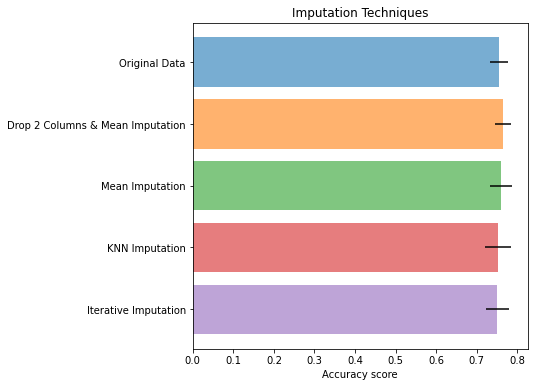

In [30]:
n_bars = len(accuracy_data)
xval = np.arange(n_bars)

# plot results
ax = plt.figure(figsize=(6, 6))
ax = plt.subplot()
for j in xval:
    plt.barh(j, accuracy_data[j], xerr=stds_data[j],
             alpha=0.6, align='center')

plt.title('Imputation Techniques')
ax.set_yticks(xval)
plt.xlabel('Accuracy score')
ax.invert_yaxis()
ax.set_yticklabels(x_labels)

plt.show()

In [31]:
pd.DataFrame([accuracy_data, stds_data], columns = x_labels, index = ['Accuracy', 'Standard deviation'])

,Original Data,Drop 2 Columns & Mean Imputation,Mean Imputation,KNN Imputation,Iterative Imputation
Accuracy,0.755241,0.764358,0.759189,0.752670,0.751371
Standard deviation,0.022017,0.019465,0.027278,0.031348,0.027420


Dropping the two columns 'SkinThickness' and 'Insulin' and imputing the zero values in 'Glucose', 'BloodPressure' and 'BMI' with mean yielded highest accuracy score and lowest standard deviation. This was probably because the two columns 'SkinThickness' and 'Insulin' contained a significant number of zero values, and including these columns for model training introduced significant error, whether or not these values were imputed. However, imputing the relatively small number of zero values in 'Glucose', 'BloodPressure' and 'BMI' contributed to improvement in accuracy score, as the mean values were better approximation to these values than zero.

When no columns were dropped and either mean, kNN or iterative imputation was used, the accuracy scores remained similar to that of the model trained on the original dataset. 


We will proceed with dropping the two columns 'SkinThickness' and 'Insulin' and imputing the zero values in 'Glucose', 'BloodPressure' and 'BMI' with the mean. 

## Data Preprocessing

In [10]:
# Remove 'SkinThickness' and 'Insulin' columns 
data.drop(['SkinThickness','Insulin'], inplace=True, axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


In [11]:
# Impute zero values in 'Glucose', 'BloodPressure' and 'BMI' (previous converted to NaN) with mean
# Code is adapted based on https://stackoverflow.com/questions/55319655/pandas-how-to-replace-zero-values-in-a-column-with-the-mean-of-that-column-for
for col in ['Glucose', 'BloodPressure', 'BMI']:
  data[col]=data[col].mask(data[col]==0).fillna(data[col].mean())

In [34]:
# Confirm there is no longer missing data
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [35]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [36]:
# Inspect summary statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
for col in data.columns:
   print(col)
   print(data.groupby(['Outcome'])[col].describe())
   print('\n')

Pregnancies
         count      mean       std  min   25%  50%  75%   max
Outcome                                                      
0        500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0
1        268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0


Glucose
         count        mean       std   min    25%    50%    75%    max
Outcome                                                               
0        500.0  110.710121  24.71706  44.0   93.0  107.5  125.0  197.0
1        268.0  142.165573  29.54175  78.0  119.0  140.0  167.0  199.0


BloodPressure
         count       mean        std   min   25%   50%   75%    max
Outcome                                                            
0        500.0  70.935397  11.931033  24.0  63.5  72.0  78.0  122.0
1        268.0  75.147324  11.945712  30.0  68.0  74.0  82.0  114.0


BMI
         count       mean       std   min    25%    50%     75%   max
Outcome                                                              
0        500

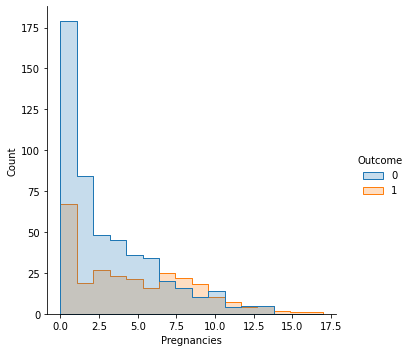

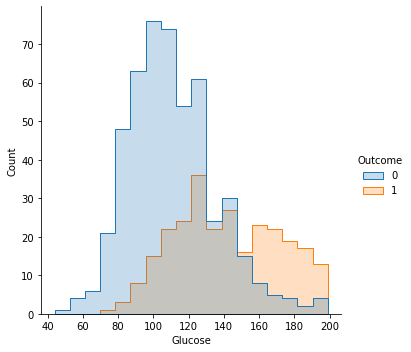

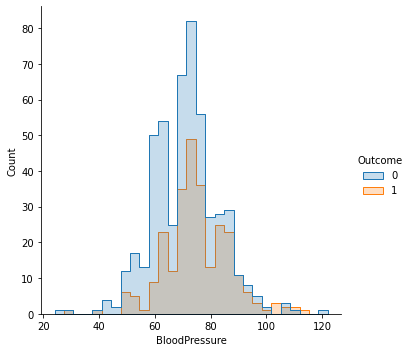

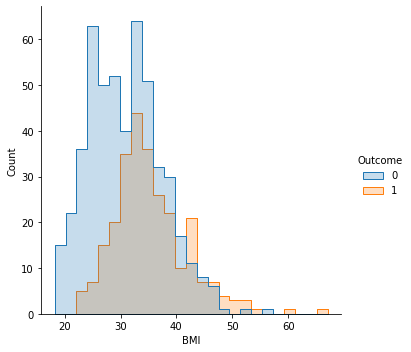

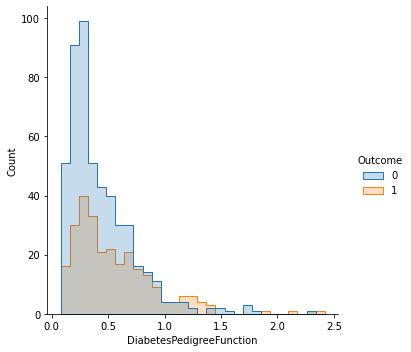

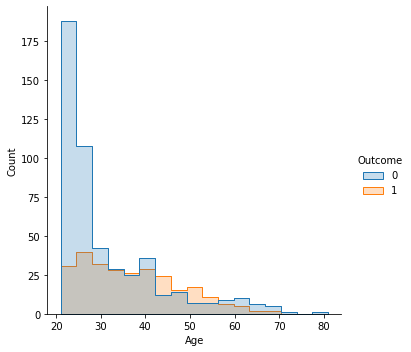

In [38]:
# Visualize the distribution of each feature in processed data
for column in data.columns:
    if column != 'Outcome':
        sns.displot(data, x=column, hue="Outcome", element="step")

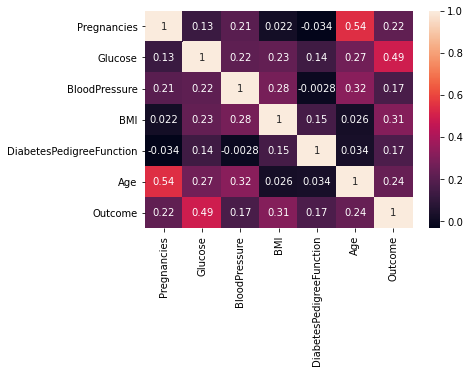

In [39]:
# Visualize correlation between variables
sns.heatmap(data.corr(),annot=True)
plt.show()

Correlation analysis revealed ‘Glucose’ showed moderate Pearson correlation of 0.49 with the target ‘Outcome’. 

[]

<Figure size 144x144 with 0 Axes>

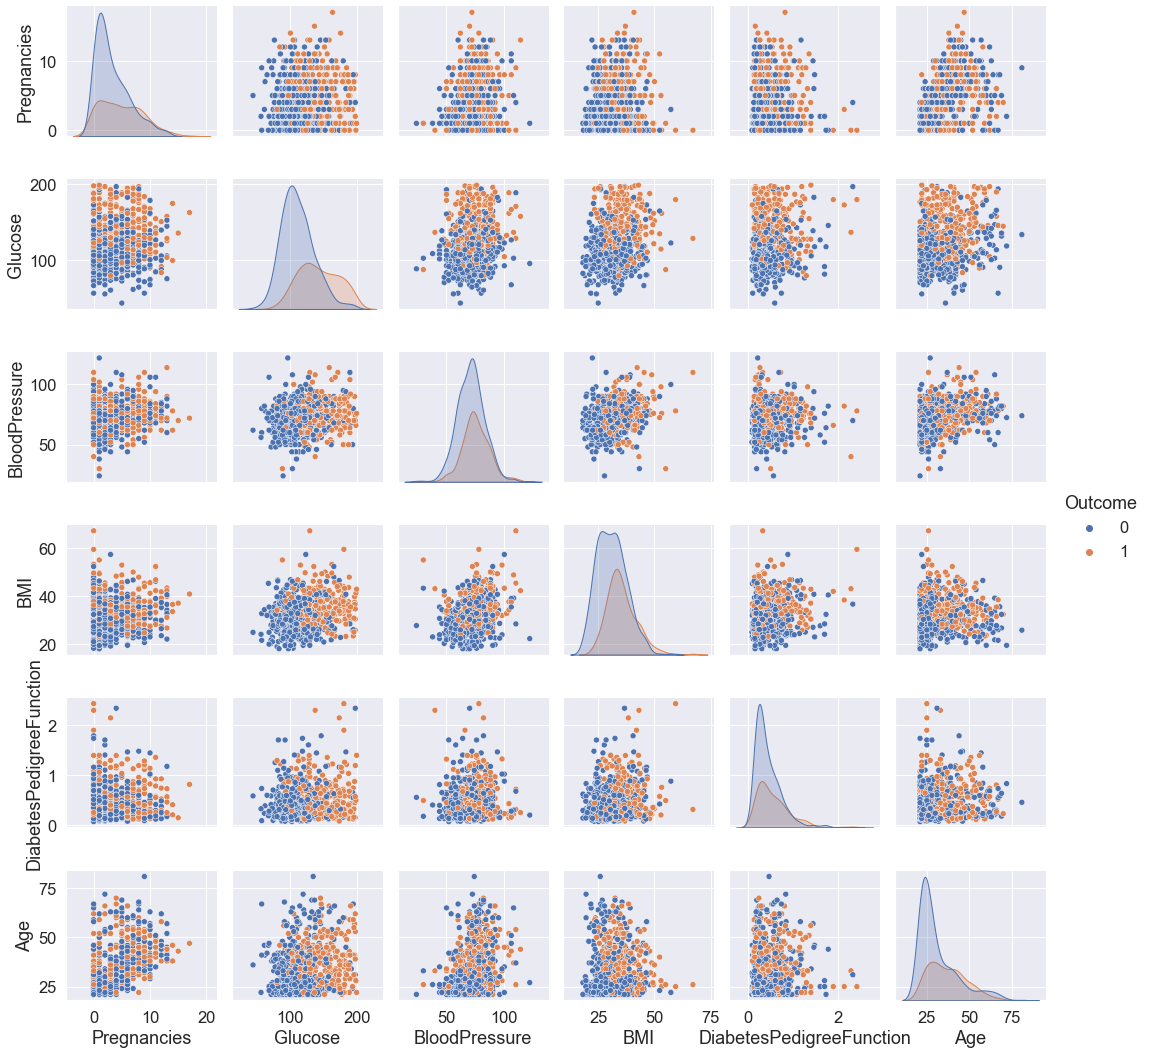

In [16]:
sns.set(font_scale=1.5)
ax = plt.figure(figsize=(2,2))
sns.pairplot(data, hue="Outcome")
plt.plot()

The scatterplot matrix revealed the data were not linearly separable with significant overlapping between the two target classes across all pairs of features. The distribution of the two classes appeared most different across ‘Glucose’, where the mean for non-diabetes females was significantly lower than for diabetes patients.

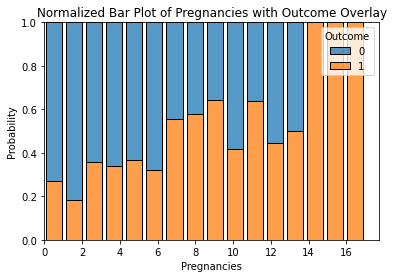

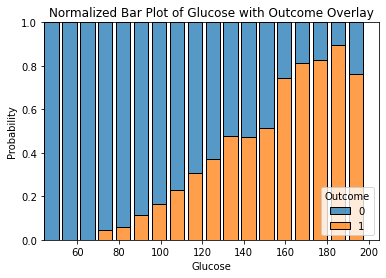

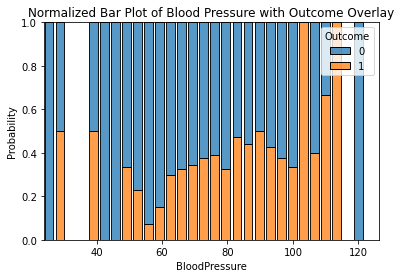

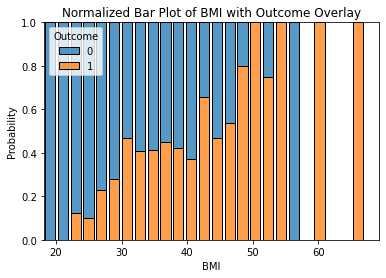

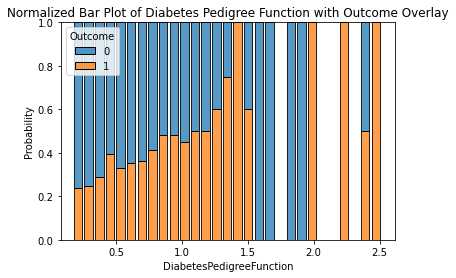

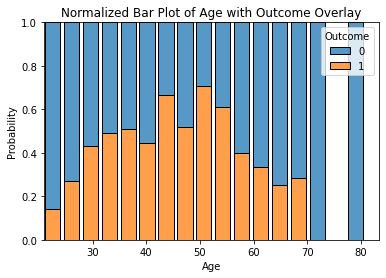

In [41]:
# Visualize normalized bar plot for each feature with outcome overlay
# Code is based on https://github.com/mwaskom/seaborn/issues/1027
sns.histplot(data, x='Pregnancies', hue="Outcome", stat="probability", multiple="fill", shrink=.8)
plt.title('Normalized Bar Plot of Pregnancies with Outcome Overlay')
plt.show()
sns.histplot(data, x='Glucose', hue="Outcome", stat="probability", multiple="fill", shrink=.8)
plt.title('Normalized Bar Plot of Glucose with Outcome Overlay')
plt.show()
sns.histplot(data, x='BloodPressure', hue="Outcome", stat="probability", multiple="fill", shrink=.8)
plt.title('Normalized Bar Plot of Blood Pressure with Outcome Overlay')
plt.show()
sns.histplot(data, x='BMI', hue="Outcome", stat="probability", multiple="fill", shrink=.8)
plt.title('Normalized Bar Plot of BMI with Outcome Overlay')
plt.show()
sns.histplot(data, x='DiabetesPedigreeFunction', hue="Outcome", stat="probability", multiple="fill", shrink=.8)
plt.title('Normalized Bar Plot of Diabetes Pedigree Function with Outcome Overlay')
plt.show()
sns.histplot(data, x='Age', hue="Outcome", stat="probability", multiple="fill", shrink=.8)
plt.title('Normalized Bar Plot of Age with Outcome Overlay')
plt.show()

Probability of having diabetes appears to increase with 'Pregnancies', 'Glucose', 'BloodPressure','Insulin','BMI' and 'DiabetesPedigreeFunction', but does not appear to increase with 'Age'.

## Export pre-processed data

In [42]:
data.to_csv('processed_diabetes.csv')

## Investigate Multicollinearity

In [18]:
# Investigate multicollinearity
# Contains code from the book 'Data Science using Python and R' by Chantal D. Larose and Daniel T. Larose
data = add_constant(data)
[variance_inflation_factor(data.values, i) for i in range(data.shape[1])][1:]

[1.4610118693482392,
 1.4030254278348044,
 1.2369658653837556,
 1.2244356469070412,
 1.0563166325512119,
 1.606838283443472,
 1.472155510897119]

No multicollearity was detected as the variance inflation factors were smaller than 5.